In [1]:
"""
keras kütüphanesinin Sequential fonksiyonu ile boş bir yapay sinir ağı modeli oluşturmak için gerekli olan sınıf çağrılır.
"""
from keras.models import Sequential
"""
Dense fonksiyonu ile yapay sinir ağı tam bağlı katmanları tanımlamak için gerekli olan sınıf çağrılır.
"""
from keras.layers import Dense
"""
Dizi işlemlerini gerçekleştirebilmemiz için numpy'ı çağırıyoruz.
"""
import numpy as np
"""
Veri setini bölebilmek için train_test_split fonksiyonunu çağırıyoruz.
"""
from sklearn.model_selection import train_test_split
"""
Veri görselleştirme kullanma durumu göz önüne alınarak matplotlib çağırıyoruz.
"""
import matplotlib.pyplot as plt
"""
Hata paylarının hesabı için metrics çağırıyoruz.
"""
from sklearn import metrics
"""
Pythonun exceli olarak sınıfladığımız pandası da verileri serialize etmek için çağırıyoruz.
"""
import pandas as pd
"""
Mssql database bağlantısı için çağırıyoruz.
"""
import pypyodbc

In [5]:
db = pypyodbc.connect(
    'Driver={SQL Server};'
    'Server=DESKTOP-QOHO2CI\SQLEXPRESS;'
    'Database=absuzmansistem;'
    'Trusted_Connection=True;'
)
imlec = db.cursor()

imlec.execute('SELECT * FROM islemsonuclari')

veriler = imlec.fetchall()

In [9]:
arac_veriler = pd.DataFrame(veriler)

In [10]:
arac_veriler

,0,1,2,3
0,1,50.400000,60.600000,25.7
1,2,13.483539,73.032922,36.0
2,3,8.037356,83.925287,45.0
3,4,38.400000,60.000000,7.0
4,5,59.400000,40.000000,41.0
...,...,...,...,...
364,365,6.925000,84.611111,48.0
365,366,33.600000,40.000000,8.0
366,367,18.815000,64.500000,44.0
367,368,25.200000,40.000000,54.0


In [12]:
sutun_isimleri = ['ID','HIZ','FRENBASINCI','EGIM']
arac_veriler.columns = sutun_isimleri

In [14]:
arac_veriler.drop('ID',axis=1, inplace=True)

In [15]:
arac_veriler

,HIZ,FRENBASINCI,EGIM
0,50.400000,60.600000,25.7
1,13.483539,73.032922,36.0
2,8.037356,83.925287,45.0
3,38.400000,60.000000,7.0
4,59.400000,40.000000,41.0
...,...,...,...
364,6.925000,84.611111,48.0
365,33.600000,40.000000,8.0
366,18.815000,64.500000,44.0
367,25.200000,40.000000,54.0


### Aşağıda ise araç verilerinin birbirleri arasında korelasyonunu inceledik. Aldığımız sonuçlara göre gözle görülen sonuçlara bilimsel olarakta onaylayarak fren basıncının hızı hızın da fren basıncını %82 oranında olumsuz etkilediği sonucuna vardık. Eğimin ise hızı olumsuz etkilerken fren basıncını olumlu etkilediği sonucuna ulaştık.


In [16]:
arac_veriler.corr()

,HIZ,FRENBASINCI,EGIM
HIZ,1.000000,-0.825292,-0.025291
FRENBASINCI,-0.825292,1.000000,0.021951
EGIM,-0.025291,0.021951,1.000000


## Yapay Zekanın Kodlanması ve Uygulanması Süreci

#### İlk olarak girdi ve çıktıları oluşturuyoruz. Girdilerimiz hız ve eğim

In [17]:
x = arac_veriler.drop("FRENBASINCI", axis = 1).values

#### Çıktımız ise fren basıncı

In [19]:
y = arac_veriler["FRENBASINCI"].values

### TEST ve Train dosylarını ayırma işlemi

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### Verileri standartlaştırma, ölçeklendirme işlemi (scaling işlemi)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
x_train = scaler.fit_transform(x_train)

In [52]:
x_test = scaler.fit_transform(x_test)

## YAPAY ZEKA EĞİTİM SÜRECİ BAŞLIYOR!

In [53]:
x_train.shape

(295, 2)

In [54]:
model = Sequential()

# katman ekleyelim şimdi
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))

# çıkış katmanı ekleyeceğiz.
model.add(Dense(1))

# compile ederken optimizer seçmek lazım "adam" en iyisi
model.compile(optimizer="adam", loss="mse")

In [55]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 15,epochs = 200)

Epoch 1/200
20/20 [==============================] - 0s 5ms/step - loss: 3185.3293 - val_loss: 3262.9370
Epoch 2/200
20/20 [==============================] - 0s 947us/step - loss: 3179.6062 - val_loss: 3257.5776
Epoch 3/200
20/20 [==============================] - 0s 947us/step - loss: 3173.9678 - val_loss: 3251.3740
Epoch 4/200
20/20 [==============================] - 0s 947us/step - loss: 3167.1931 - val_loss: 3243.3015
Epoch 5/200
20/20 [==============================] - 0s 898us/step - loss: 3157.8193 - val_loss: 3232.4087
Epoch 6/200
20/20 [==============================] - 0s 898us/step - loss: 3145.2153 - val_loss: 3217.5688
Epoch 7/200
20/20 [==============================] - 0s 898us/step - loss: 3128.1389 - val_loss: 3197.3108
Epoch 8/200
20/20 [==============================] - 0s 898us/step - loss: 3104.7786 - val_loss: 3169.7368
Epoch 9/200
20/20 [==============================] - 0s 898us/step - loss: 3072.8918 - val_loss: 3132.5728
Epoch 10/200
20/20 [===================

20/20 [==============================] - 0s 947us/step - loss: 307.5607 - val_loss: 330.9183
Epoch 79/200
20/20 [==============================] - 0s 898us/step - loss: 302.8438 - val_loss: 325.3252
Epoch 80/200
20/20 [==============================] - 0s 898us/step - loss: 297.8318 - val_loss: 319.0096
Epoch 81/200
20/20 [==============================] - 0s 848us/step - loss: 292.4554 - val_loss: 313.7026
Epoch 82/200
20/20 [==============================] - 0s 848us/step - loss: 288.0287 - val_loss: 308.2448
Epoch 83/200
20/20 [==============================] - 0s 898us/step - loss: 283.4091 - val_loss: 301.8727
Epoch 84/200
20/20 [==============================] - 0s 848us/step - loss: 277.8678 - val_loss: 296.2534
Epoch 85/200
20/20 [==============================] - 0s 848us/step - loss: 273.0538 - val_loss: 290.5648
Epoch 86/200
20/20 [==============================] - 0s 848us/step - loss: 269.7765 - val_loss: 284.1671
Epoch 87/200
20/20 [==============================] - 0s 84

Epoch 155/200
20/20 [==============================] - 0s 898us/step - loss: 134.2551 - val_loss: 106.6231
Epoch 156/200
20/20 [==============================] - 0s 898us/step - loss: 134.0932 - val_loss: 106.8942
Epoch 157/200
20/20 [==============================] - 0s 898us/step - loss: 133.9304 - val_loss: 106.7202
Epoch 158/200
20/20 [==============================] - 0s 898us/step - loss: 134.0707 - val_loss: 106.6771
Epoch 159/200
20/20 [==============================] - 0s 898us/step - loss: 133.3966 - val_loss: 106.5511
Epoch 160/200
20/20 [==============================] - 0s 898us/step - loss: 133.5184 - val_loss: 106.4409
Epoch 161/200
20/20 [==============================] - 0s 898us/step - loss: 133.4969 - val_loss: 106.2959
Epoch 162/200
20/20 [==============================] - 0s 848us/step - loss: 134.2212 - val_loss: 106.5580
Epoch 163/200
20/20 [==============================] - 0s 898us/step - loss: 133.3154 - val_loss: 106.2851
Epoch 164/200
20/20 [================

In [56]:
kayipVeri = pd.DataFrame(model.history.history)

In [57]:
kayipVeri.head()

,loss,val_loss
0,3185.329346,3262.937012
1,3179.606201,3257.577637
2,3173.967773,3251.374023
3,3167.193115,3243.301514
4,3157.819336,3232.408691


<AxesSubplot:>

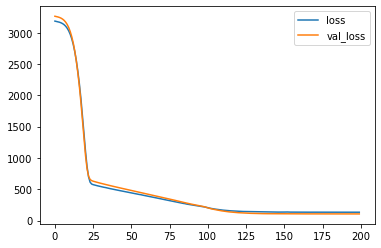

In [58]:
kayipVeri.plot()

## Sonuçların Değerlendirilmesi

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
tahmin = model.predict(x_test)

In [61]:
mean_absolute_error(y_test, tahmin)

8.70658442869527

## Tahmin yaptırılması

In [74]:
yeni_deger = [60,25]

In [75]:
yeni_deger = pd.DataFrame(yeni_deger)

In [77]:
yeni_deger[0]

0    60
1    25
Name: 0, dtype: int64

In [79]:
yeni_deger = scaler.transform(yeni_deger[0].values.reshape(-1, 2))

In [81]:
model.predict(yeni_deger)

array([[30.40357]], dtype=float32)